<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/05/logoBIGDIVE-01.png">
</center>

---

# Clustering

## André Panisson

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Prepare a sinthetic dataset for this example.

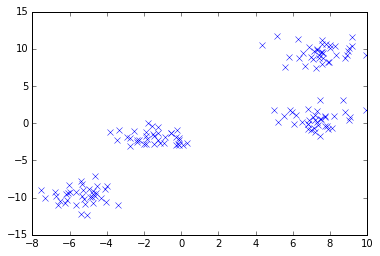

In [2]:
from sklearn import datasets

X, _ = datasets.make_blobs(n_samples=150, random_state=8, centers=4)
# X, _ = datasets.make_circles(n_samples=150, factor=.5, noise=.05)

plot(X[:, 0], X[:, 1], 'bx')

# Kmeans clustering

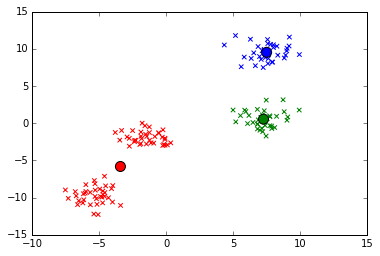

In [5]:
np.random.seed(42)

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3, init='random',
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)

colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

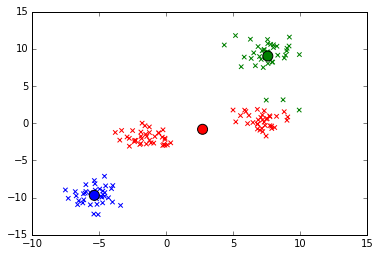

In [14]:
np.random.seed(43) # molto sensibile ai dati iniziali: basta cambiare il seed e cambia il risultato

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3, init='random',
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)

colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

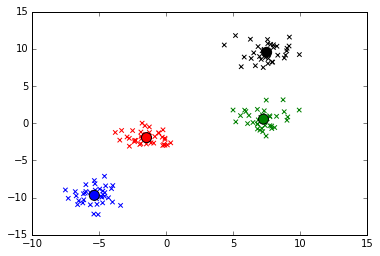

In [15]:
np.random.seed(43)

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=4, init='random', # gli dico che i cluster devono essere 4
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)

colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

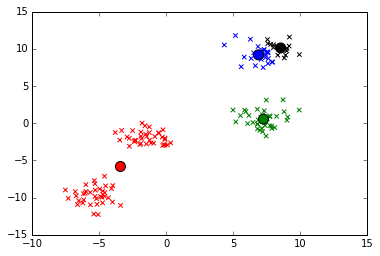

In [16]:
np.random.seed(42) # ma basta cambiare il seed che succedono cose strane

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=4, init='random', # gli dico che i cluster devono essere 4
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)

colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

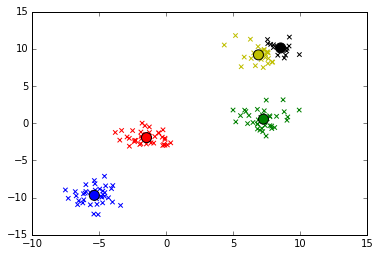

In [19]:
np.random.seed(43) # ma basta cambiare il seed che succedono cose strane

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=5, init='random', # gli dico che i cluster devono essere 5
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)

colors = array(['b', 'r', 'g', 'k', 'y'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

Per vedere se ho azzeccato il numero di cluster posso guardare alla distanza dei centroidi fra loro.

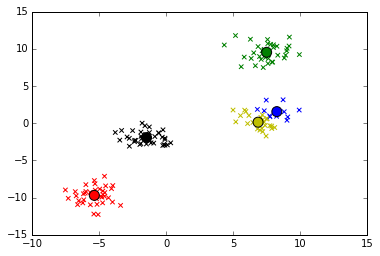

In [21]:
np.random.seed(43) # ma basta cambiare il seed che succedono cose strane

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=5, init='k-means++', # gli dico che i cluster devono essere 5 e cambio l'init
                        n_init=1, max_iter=10)
C = kmeans.fit_predict(X)

colors = array(['b', 'r', 'g', 'k', 'y'])
scatter(X[:, 0], X[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], s=100, c=colors)

# Hierarchical clustering

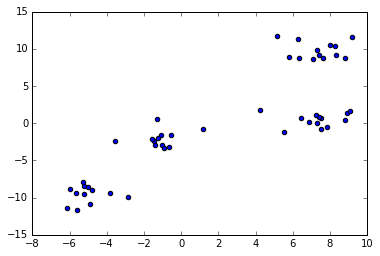

In [22]:
X, _ = datasets.make_blobs(n_samples=50, random_state=8, centers=4)
# X, _ = datasets.make_circles(n_samples=200, factor=.1, noise=.05)

scatter(X[:, 0], X[:, 1]);

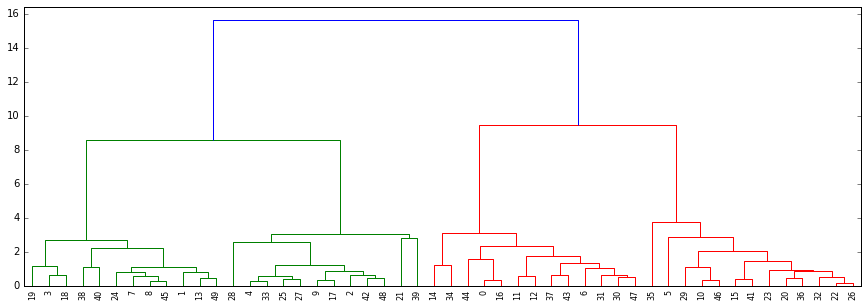

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X, method='average', metric='euclidean') # una metrica importante e' cosine
figure(figsize=(15,5))
P = dendrogram(Z);

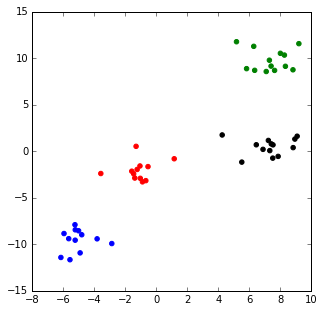

In [24]:
T = fcluster(Z, 4, 'maxclust')

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[T-1]);

### Hierarchical Clustering in Scikit-Learn:

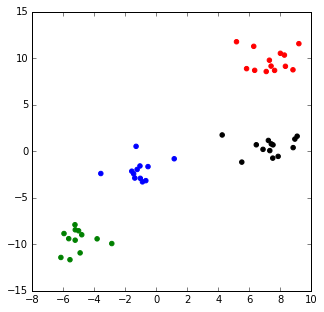

In [25]:
from sklearn import cluster

model = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')

clusters = model.fit_predict(X)

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[clusters-1]);

# Excercise

Test the different clustering approaches with a "circles" dataset.

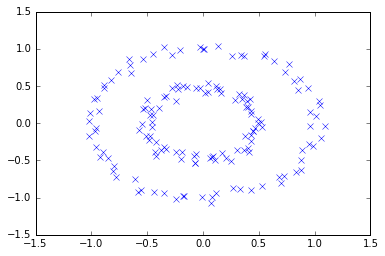

In [27]:
from sklearn import datasets

X, _ = datasets.make_circles(n_samples=150, factor=.5, noise=.05)

plot(X[:,0], X[:,1], 'bx')

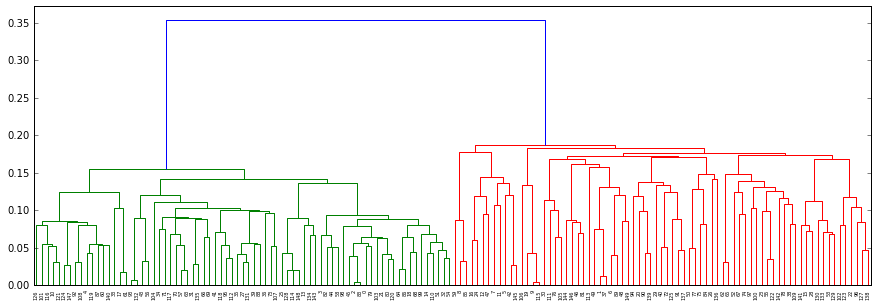

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X, method='single', metric='euclidean')
figure(figsize=(15,5))
P = dendrogram(Z);

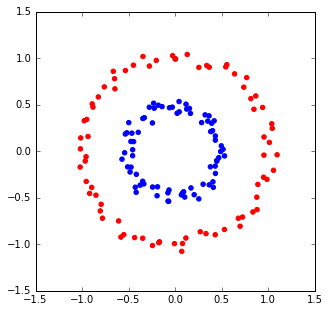

In [40]:
T = fcluster(Z, 2, 'maxclust')

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[T-1]);

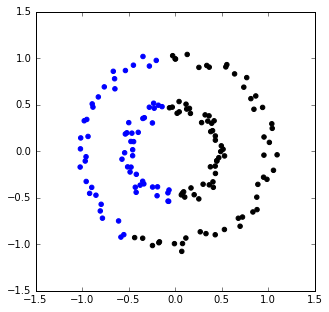

In [42]:
model = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

clusters = model.fit_predict(X)

figure(figsize=(5,5))
colors = array(['b', 'r', 'g', 'k'])
scatter(X[:, 0], X[:, 1], color=colors[clusters-1]); # sklearn non ha single che e' il solo metodo che funziona